# Exploratory Data Analysis: Online Retail II Dataset

This notebook performs a comprehensive EDA of the Online Retail II dataset to understand customer purchasing patterns for potential survival analysis using Cox Proportional Hazards Model.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

In [2]:
# Load the dataset
df = pd.read_csv('online_retail_II.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [6]:
df.value_counts

<bound method DataFrame.value_counts of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price  Customer I

---
## 1. Dataset Overview

In [7]:
# Number of rows and columns
print("=" * 50)
print("DATASET DIMENSIONS")
print("=" * 50)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

DATASET DIMENSIONS
Number of rows: 1,067,371
Number of columns: 8


In [8]:
# Column names and data types
print("\n" + "=" * 50)
print("COLUMN INFORMATION")
print("=" * 50)
print(df.dtypes.to_frame('Data Type'))


COLUMN INFORMATION
            Data Type
Invoice        object
StockCode      object
Description    object
Quantity        int64
InvoiceDate    object
Price         float64
Customer ID   float64
Country        object


In [9]:
# Detailed info
print("\n" + "=" * 50)
print("DETAILED DATASET INFO")
print("=" * 50)
df.info()


DETAILED DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [10]:
# Memory usage summary
print("\n" + "=" * 50)
print("MEMORY USAGE")
print("=" * 50)
memory_usage = df.memory_usage(deep=True)
print(f"Total memory usage: {memory_usage.sum() / (1024**2):.2f} MB")
print("\nMemory usage per column:")
for col in df.columns:
    print(f"  {col}: {memory_usage[col] / (1024**2):.2f} MB")


MEMORY USAGE
Total memory usage: 385.80 MB

Memory usage per column:
  Invoice: 64.15 MB
  StockCode: 63.23 MB
  Description: 84.96 MB
  Quantity: 8.14 MB
  InvoiceDate: 77.36 MB
  Price: 8.14 MB
  Customer ID: 8.14 MB
  Country: 71.68 MB


In [11]:
# First few rows
print("\n" + "=" * 50)
print("SAMPLE DATA (First 5 rows)")
print("=" * 50)
df.head()


SAMPLE DATA (First 5 rows)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


---
## 2. Data Quality Assessment

In [12]:
# Missing values per column
print("=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)

missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data.sort_values('Missing Percentage', ascending=False)
print(missing_data)

MISSING VALUES ANALYSIS
             Missing Count  Missing Percentage
Customer ID         243007               22.77
Description           4382                0.41
StockCode                0                0.00
Invoice                  0                0.00
Quantity                 0                0.00
InvoiceDate              0                0.00
Price                    0                0.00
Country                  0                0.00


In [14]:
# Duplicate rows analysis
print("\n" + "=" * 50)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 50)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates:,}")
print(f"Percentage of duplicates: {(duplicates / len(df) * 100):.2f}%")

if duplicates > 0:
    print("\nSample of duplicate rows:")
    display(df[df.duplicated(keep=False)].head(10))


DUPLICATE ROWS ANALYSIS
Number of duplicate rows: 34,335
Percentage of duplicates: 3.22%

Sample of duplicate rows:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
362,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.00,United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.00,United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.00,United Kingdom
367,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.00,United Kingdom
368,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.00,United Kingdom
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.00,United Kingdom
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.00,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.00,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.00,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.00,United Kingdom


In [15]:
# Data entry errors check
print("\n" + "=" * 50)
print("POTENTIAL DATA ENTRY ERRORS")
print("=" * 50)

# Check for negative quantities (could be returns)
negative_qty = df[df['Quantity'] < 0]
print(f"\nRows with negative quantity: {len(negative_qty):,} ({len(negative_qty)/len(df)*100:.2f}%)")
print("(These may represent returns/cancellations)")

# Check for zero or negative prices
zero_price = df[df['Price'] <= 0]
print(f"\nRows with zero or negative price: {len(zero_price):,} ({len(zero_price)/len(df)*100:.2f}%)")

# Check for cancelled invoices (starting with 'C')
cancelled = df[df['Invoice'].astype(str).str.startswith('C')]
print(f"\nCancelled invoices (starting with 'C'): {len(cancelled):,} ({len(cancelled)/len(df)*100:.2f}%)")


POTENTIAL DATA ENTRY ERRORS

Rows with negative quantity: 22,950 (2.15%)
(These may represent returns/cancellations)

Rows with zero or negative price: 6,207 (0.58%)

Cancelled invoices (starting with 'C'): 19,494 (1.83%)


In [16]:
# Check Invoice patterns
print("\n" + "=" * 50)
print("INVOICE PATTERNS")
print("=" * 50)
print("\nSample Invoice values:")
print(df['Invoice'].unique()[:20])
print(f"\nTotal unique invoices: {df['Invoice'].nunique():,}")


INVOICE PATTERNS

Sample Invoice values:
['489434' '489435' '489436' '489437' '489438' '489439' '489440' '489441'
 '489442' '489443' '489444' '489445' '489446' '489447' '489448' 'C489449'
 '489450' 'C489459' '489460' '489461']

Total unique invoices: 53,628


---
## 3. Descriptive Statistics

In [17]:
# Summary statistics for numerical columns
print("=" * 50)
print("NUMERICAL COLUMNS - SUMMARY STATISTICS")
print("=" * 50)
df.describe()

NUMERICAL COLUMNS - SUMMARY STATISTICS


,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [18]:
# Extended statistics
print("\n" + "=" * 50)
print("EXTENDED STATISTICS FOR NUMERICAL COLUMNS")
print("=" * 50)

numerical_cols = ['Quantity', 'Price']
for col in numerical_cols:
    print(f"\n--- {col} ---")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {df[col].mode().values[0]:.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")
    print(f"  Range: {df[col].min():.2f} to {df[col].max():.2f}")


EXTENDED STATISTICS FOR NUMERICAL COLUMNS

--- Quantity ---
  Mean: 9.94
  Median: 3.00
  Mode: 1.00
  Std Dev: 172.71
  Skewness: 4.00
  Kurtosis: 155059.69
  Range: -80995.00 to 80995.00

--- Price ---
  Mean: 4.65
  Median: 2.10
  Mode: 1.25
  Std Dev: 123.55
  Skewness: -69.16
  Kurtosis: 73751.83
  Range: -53594.36 to 38970.00


In [19]:
# Value counts for categorical columns
print("\n" + "=" * 50)
print("CATEGORICAL COLUMNS - VALUE COUNTS")
print("=" * 50)

# Country distribution
print("\n--- Top 10 Countries ---")
country_counts = df['Country'].value_counts().head(10)
print(country_counts)
print(f"\nTotal unique countries: {df['Country'].nunique()}")


CATEGORICAL COLUMNS - VALUE COUNTS

--- Top 10 Countries ---
Country
United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Spain               3811
Switzerland         3189
Belgium             3123
Portugal            2620
Australia           1913
Name: count, dtype: int64

Total unique countries: 43


In [20]:
# Top products
print("\n--- Top 10 Products (by Description) ---")
product_counts = df['Description'].value_counts().head(10)
print(product_counts)
print(f"\nTotal unique products: {df['Description'].nunique()}")


--- Top 10 Products (by Description) ---
Description
WHITE HANGING HEART T-LIGHT HOLDER    5918
REGENCY CAKESTAND 3 TIER              4412
JUMBO BAG RED RETROSPOT               3469
ASSORTED COLOUR BIRD ORNAMENT         2958
PARTY BUNTING                         2765
STRAWBERRY CERAMIC TRINKET BOX        2613
LUNCH BAG  BLACK SKULL.               2529
JUMBO STORAGE BAG SUKI                2434
HEART OF WICKER SMALL                 2319
JUMBO SHOPPER VINTAGE RED PAISLEY     2297
Name: count, dtype: int64

Total unique products: 5698


In [21]:
# Top stock codes
print("\n--- Top 10 Stock Codes ---")
stockcode_counts = df['StockCode'].value_counts().head(10)
print(stockcode_counts)
print(f"\nTotal unique stock codes: {df['StockCode'].nunique()}")


--- Top 10 Stock Codes ---
StockCode
85123A    5829
22423     4424
85099B    4216
21212     3318
20725     3259
84879     2960
47566     2768
21232     2747
22197     2549
22383     2540
Name: count, dtype: int64

Total unique stock codes: 5305


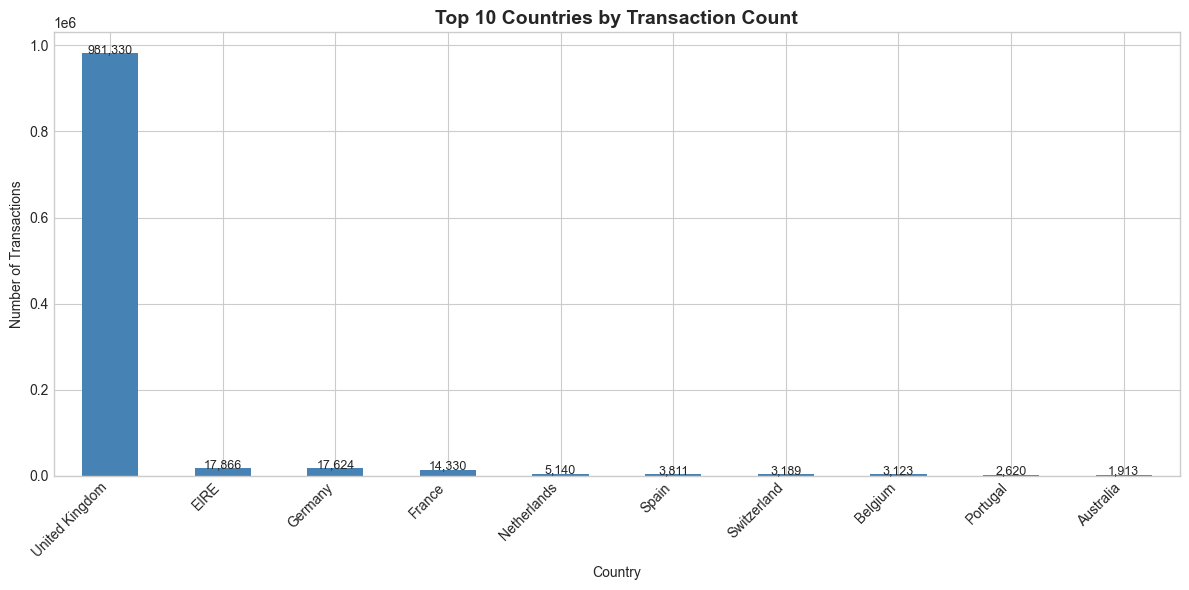

In [22]:
# Visualize country distribution
fig, ax = plt.subplots(figsize=(12, 6))
country_counts.plot(kind='bar', color='steelblue', ax=ax)
ax.set_title('Top 10 Countries by Transaction Count', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Transactions')
ax.set_xlabel('Country')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(country_counts):
    ax.text(i, v + 1000, f'{v:,}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

In [23]:
# Outlier detection using IQR method
print("\n" + "=" * 50)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 50)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n--- {col} ---")
    print(f"  Lower bound: {lower:.2f}")
    print(f"  Upper bound: {upper:.2f}")
    print(f"  Number of outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")


OUTLIER DETECTION (IQR Method)

--- Quantity ---
  Lower bound: -12.50
  Upper bound: 23.50
  Number of outliers: 116,489 (10.91%)

--- Price ---
  Lower bound: -3.10
  Upper bound: 8.50
  Number of outliers: 68,105 (6.38%)


---
## 4. Data Distribution Analysis

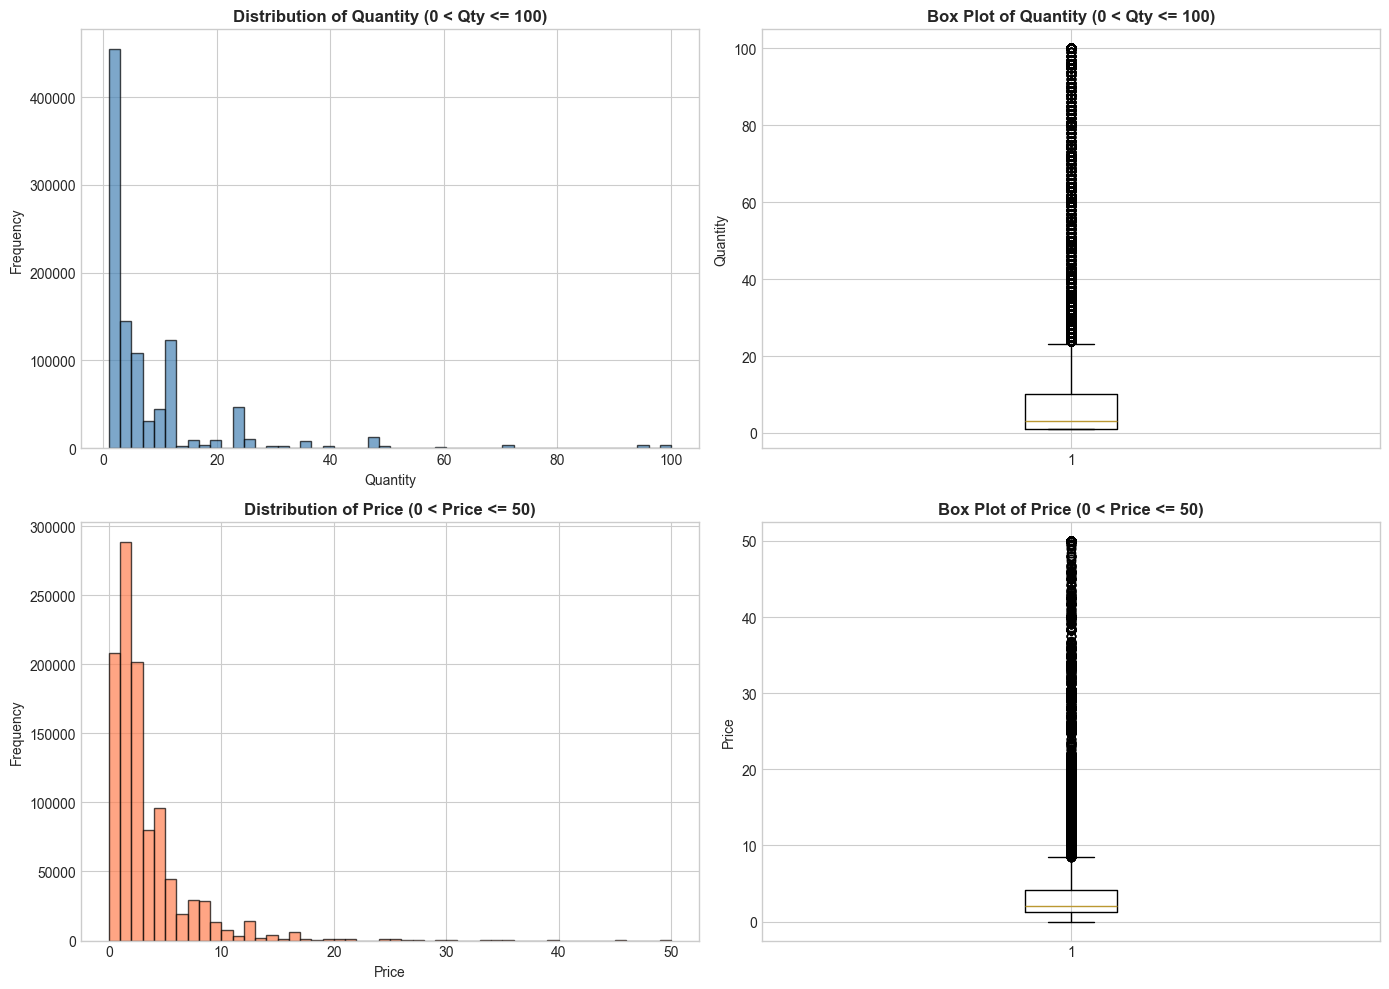

In [24]:
# Distribution of Quantity
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Quantity histogram (filtered for better visualization)
qty_filtered = df[(df['Quantity'] > 0) & (df['Quantity'] <= 100)]['Quantity']
axes[0, 0].hist(qty_filtered, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Quantity (0 < Qty <= 100)', fontweight='bold')
axes[0, 0].set_xlabel('Quantity')
axes[0, 0].set_ylabel('Frequency')

# Quantity box plot
axes[0, 1].boxplot(qty_filtered, vert=True)
axes[0, 1].set_title('Box Plot of Quantity (0 < Qty <= 100)', fontweight='bold')
axes[0, 1].set_ylabel('Quantity')

# Price histogram (filtered)
price_filtered = df[(df['Price'] > 0) & (df['Price'] <= 50)]['Price']
axes[1, 0].hist(price_filtered, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Price (0 < Price <= 50)', fontweight='bold')
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Frequency')

# Price box plot
axes[1, 1].boxplot(price_filtered, vert=True)
axes[1, 1].set_title('Box Plot of Price (0 < Price <= 50)', fontweight='bold')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [25]:
# Convert InvoiceDate to datetime for time-based analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract date components
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

print("Date range in dataset:")
print(f"  Start: {df['InvoiceDate'].min()}")
print(f"  End: {df['InvoiceDate'].max()}")
print(f"  Duration: {(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days} days")

Date range in dataset:
  Start: 2009-12-01 07:45:00
  End: 2011-12-09 12:50:00
  Duration: 738 days


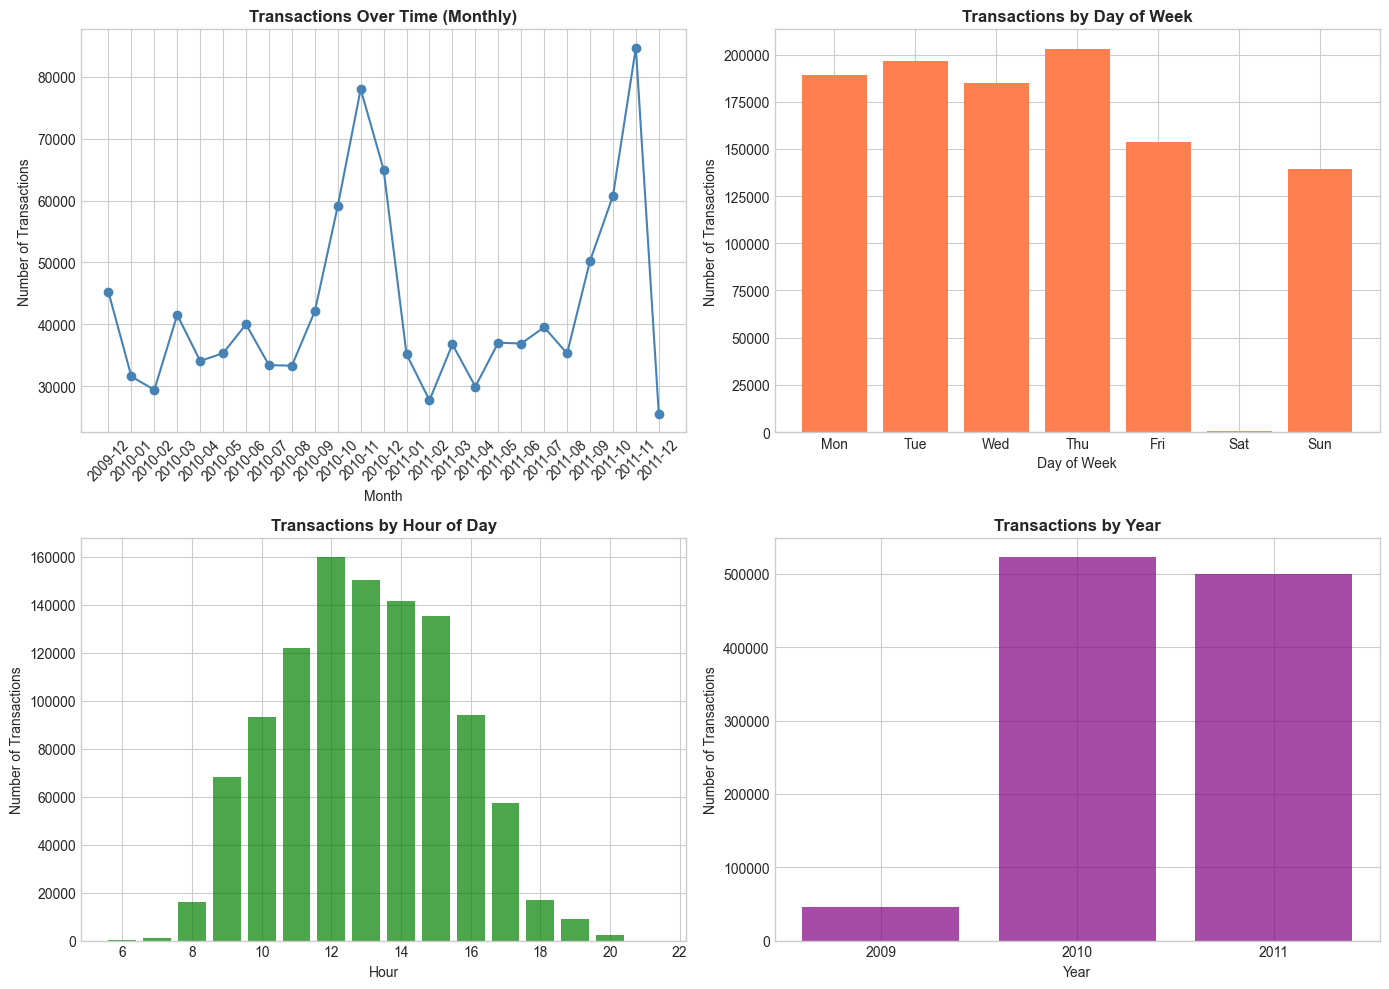

In [26]:
# Temporal distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Transactions by month
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')
monthly_counts['Period'] = monthly_counts['Year'].astype(str) + '-' + monthly_counts['Month'].astype(str).str.zfill(2)
axes[0, 0].plot(monthly_counts['Period'], monthly_counts['Count'], marker='o', color='steelblue')
axes[0, 0].set_title('Transactions Over Time (Monthly)', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].tick_params(axis='x', rotation=45)

# Transactions by day of week
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_counts = df['DayOfWeek'].value_counts().sort_index()
axes[0, 1].bar(day_names[:len(dow_counts)], dow_counts.values, color='coral')
axes[0, 1].set_title('Transactions by Day of Week', fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Number of Transactions')

# Transactions by hour
hour_counts = df['Hour'].value_counts().sort_index()
axes[1, 0].bar(hour_counts.index, hour_counts.values, color='green', alpha=0.7)
axes[1, 0].set_title('Transactions by Hour of Day', fontweight='bold')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Number of Transactions')

# Transactions by year
year_counts = df['Year'].value_counts().sort_index()
axes[1, 1].bar(year_counts.index.astype(str), year_counts.values, color='purple', alpha=0.7)
axes[1, 1].set_title('Transactions by Year', fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

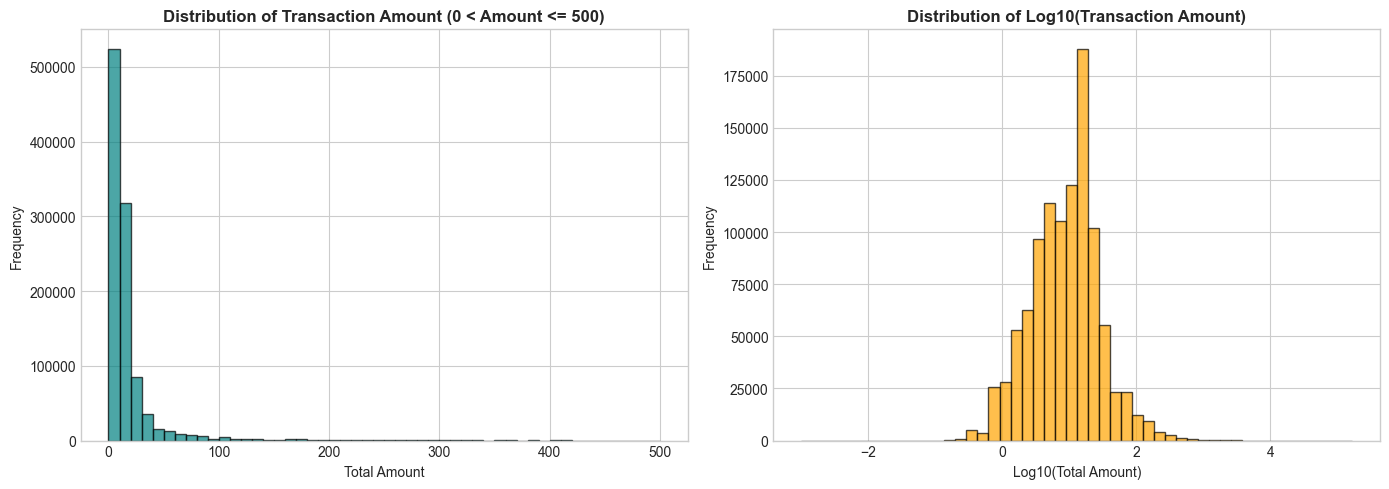

In [27]:
# Create Total Amount column
df['TotalAmount'] = df['Quantity'] * df['Price']

# Distribution of Total Amount
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Filtered for visualization
amount_filtered = df[(df['TotalAmount'] > 0) & (df['TotalAmount'] <= 500)]['TotalAmount']

axes[0].hist(amount_filtered, bins=50, color='teal', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Transaction Amount (0 < Amount <= 500)', fontweight='bold')
axes[0].set_xlabel('Total Amount')
axes[0].set_ylabel('Frequency')

# Log scale for full distribution
amount_positive = df[df['TotalAmount'] > 0]['TotalAmount']
axes[1].hist(np.log10(amount_positive), bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Log10(Transaction Amount)', fontweight='bold')
axes[1].set_xlabel('Log10(Total Amount)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---
## 5. Relationships and Correlations

In [28]:
# Correlation matrix for numerical variables
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

# Select numerical columns for correlation
numerical_for_corr = df[['Quantity', 'Price', 'TotalAmount', 'Hour', 'Month', 'DayOfWeek']].copy()

# Calculate correlation matrix
corr_matrix = numerical_for_corr.corr()
print("\nCorrelation Matrix:")
print(corr_matrix.round(3))

CORRELATION ANALYSIS

Correlation Matrix:
             Quantity  Price  TotalAmount  Hour  Month  DayOfWeek
Quantity         1.00  -0.00         0.76 -0.01  -0.00      -0.00
Price           -0.00   1.00         0.06  0.00  -0.00      -0.00
TotalAmount      0.76   0.06         1.00 -0.01  -0.00      -0.00
Hour            -0.01   0.00        -0.01  1.00   0.03      -0.02
Month           -0.00  -0.00        -0.00  0.03   1.00       0.02
DayOfWeek       -0.00  -0.00        -0.00 -0.02   0.02       1.00


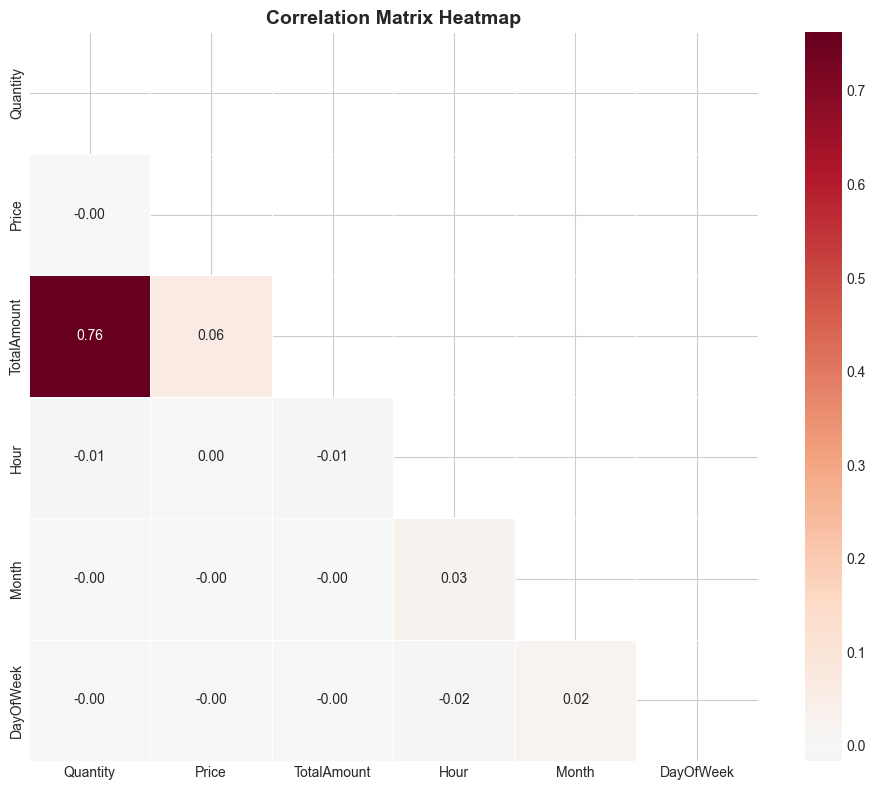

In [29]:
# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, fmt='.2f', ax=ax)
ax.set_title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [30]:
# Identify strong correlations
print("\n" + "=" * 50)
print("STRONG CORRELATIONS (|r| > 0.7)")
print("=" * 50)

# Find strong correlations
strong_corrs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corrs.append({
                'Variable 1': corr_matrix.columns[i],
                'Variable 2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

if strong_corrs:
    strong_corr_df = pd.DataFrame(strong_corrs)
    print(strong_corr_df)
else:
    print("No correlations with |r| > 0.7 found (excluding TotalAmount which is derived)")


STRONG CORRELATIONS (|r| > 0.7)
  Variable 1   Variable 2  Correlation
0   Quantity  TotalAmount         0.76


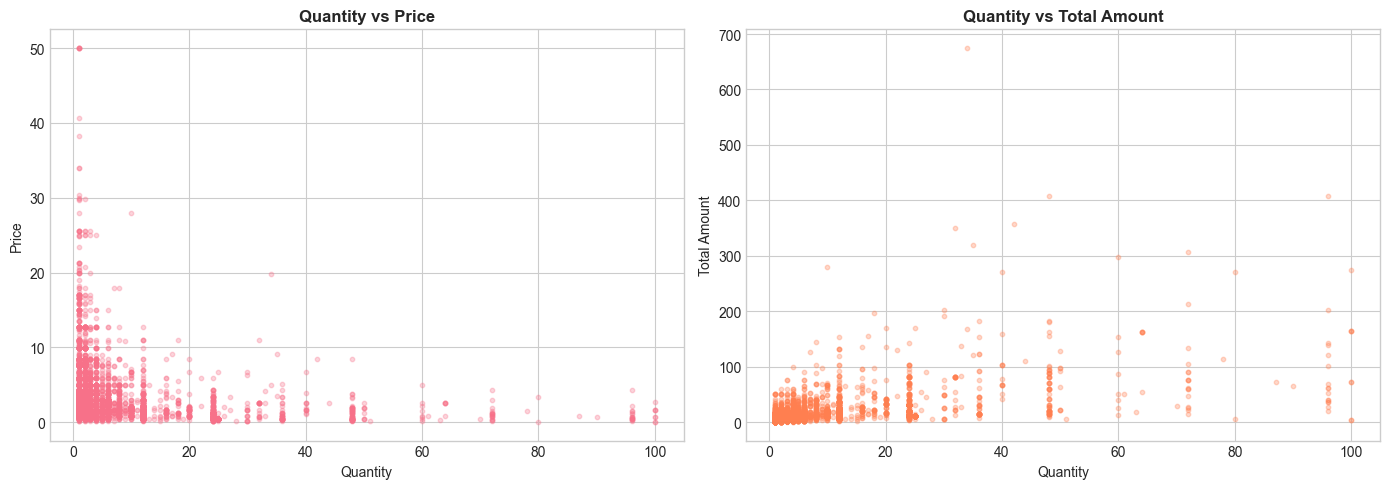

In [31]:
# Scatter plot: Quantity vs Price
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sample for visualization (full dataset is too large)
sample = df[(df['Quantity'] > 0) & (df['Quantity'] <= 100) & 
            (df['Price'] > 0) & (df['Price'] <= 50)].sample(min(5000, len(df)))

axes[0].scatter(sample['Quantity'], sample['Price'], alpha=0.3, s=10)
axes[0].set_title('Quantity vs Price', fontweight='bold')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Price')

# Quantity vs Total Amount
axes[1].scatter(sample['Quantity'], sample['TotalAmount'], alpha=0.3, s=10, color='coral')
axes[1].set_title('Quantity vs Total Amount', fontweight='bold')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Total Amount')

plt.tight_layout()
plt.show()

In [32]:
# Customer analysis
print("\n" + "=" * 50)
print("CUSTOMER ANALYSIS")
print("=" * 50)

# Remove rows without customer ID for customer analysis
df_customers = df[df['Customer ID'].notna()].copy()

print(f"\nTotal customers: {df_customers['Customer ID'].nunique():,}")
print(f"Total transactions with customer ID: {len(df_customers):,}")

# Customer purchase frequency
customer_freq = df_customers.groupby('Customer ID').agg({
    'Invoice': 'nunique',
    'TotalAmount': 'sum',
    'Quantity': 'sum'
}).rename(columns={'Invoice': 'NumOrders', 'TotalAmount': 'TotalSpent', 'Quantity': 'TotalItems'})

print("\nCustomer Purchase Statistics:")
print(customer_freq.describe())


CUSTOMER ANALYSIS

Total customers: 5,942
Total transactions with customer ID: 824,364

Customer Purchase Statistics:
       NumOrders  TotalSpent  TotalItems
count    5942.00     5942.00     5942.00
mean        7.55     2801.80     1722.34
std        15.97    13973.92     8563.25
min         1.00   -25111.09    -1085.00
25%         2.00      325.10      180.00
50%         4.00      843.97      474.00
75%         8.00     2182.01     1340.75
max       510.00   598215.22   365220.00


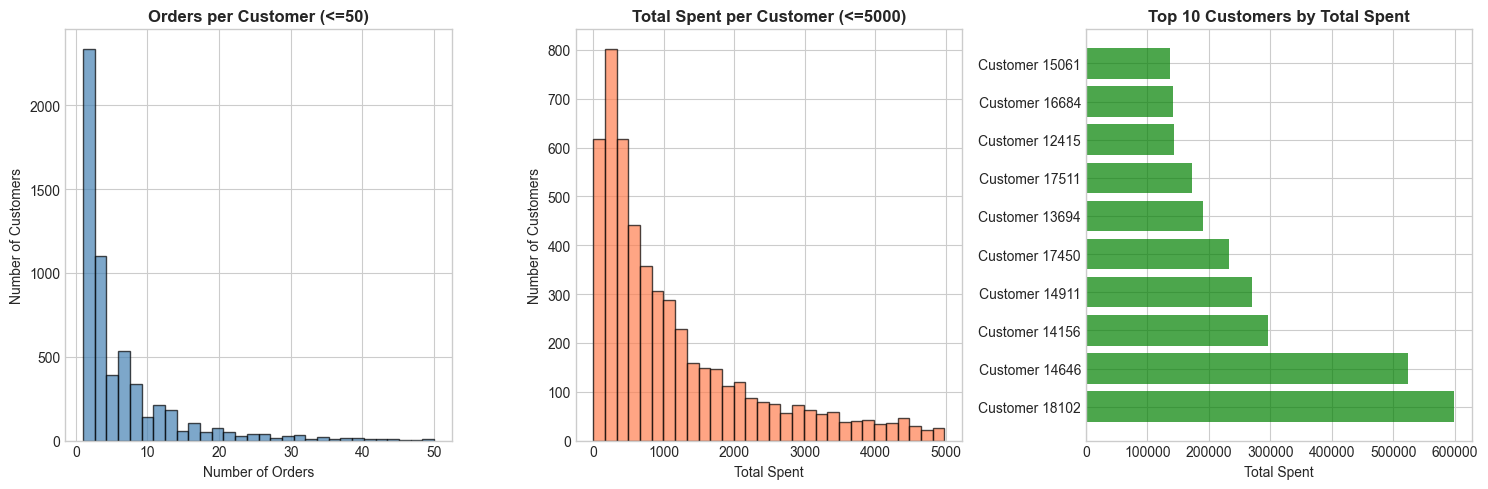

In [33]:
# Customer segmentation visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distribution of orders per customer
orders_filtered = customer_freq[customer_freq['NumOrders'] <= 50]['NumOrders']
axes[0].hist(orders_filtered, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Orders per Customer (<=50)', fontweight='bold')
axes[0].set_xlabel('Number of Orders')
axes[0].set_ylabel('Number of Customers')

# Distribution of total spent per customer
spent_filtered = customer_freq[(customer_freq['TotalSpent'] > 0) & 
                               (customer_freq['TotalSpent'] <= 5000)]['TotalSpent']
axes[1].hist(spent_filtered, bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Total Spent per Customer (<=5000)', fontweight='bold')
axes[1].set_xlabel('Total Spent')
axes[1].set_ylabel('Number of Customers')

# Top 10 customers by spending
top_customers = customer_freq.nlargest(10, 'TotalSpent')
axes[2].barh(range(10), top_customers['TotalSpent'].values, color='green', alpha=0.7)
axes[2].set_yticks(range(10))
axes[2].set_yticklabels([f'Customer {int(x)}' for x in top_customers.index])
axes[2].set_title('Top 10 Customers by Total Spent', fontweight='bold')
axes[2].set_xlabel('Total Spent')

plt.tight_layout()
plt.show()

---
## 6. Key Insights

In [34]:
print("=" * 60)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 60)

insights = """
1. GEOGRAPHIC CONCENTRATION:
   - The dataset is heavily dominated by United Kingdom transactions
   - This suggests the retail business is primarily UK-based with international shipping

2. CUSTOMER ID MISSING VALUES:
   - A significant percentage of transactions lack Customer ID
   - These could be guest purchases or B2B transactions
   - Important to handle for customer lifetime value analysis

3. CANCELLED TRANSACTIONS:
   - Invoices starting with 'C' indicate cancellations
   - Negative quantities also represent returns
   - These need special handling in analysis

4. TEMPORAL PATTERNS:
   - Clear seasonality observed (likely holiday shopping peaks)
   - Business hours concentrated during day time
   - Weekday vs weekend patterns exist

5. PRICE & QUANTITY DISTRIBUTIONS:
   - Both are right-skewed with many outliers
   - Most transactions involve small quantities at low prices
   - Bulk orders create significant outliers

6. CUSTOMER BEHAVIOR:
   - Most customers make few purchases (one-time buyers)
   - Small percentage of customers contribute majority of revenue
   - Classic Pareto distribution in customer value

7. DATA QUALITY FLAGS:
   - Duplicate rows exist in the dataset
   - Some zero/negative prices need investigation
   - Product descriptions have inconsistencies (leading spaces, variations)
"""
print(insights)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. GEOGRAPHIC CONCENTRATION:
   - The dataset is heavily dominated by United Kingdom transactions
   - This suggests the retail business is primarily UK-based with international shipping

2. CUSTOMER ID MISSING VALUES:
   - A significant percentage of transactions lack Customer ID
   - These could be guest purchases or B2B transactions
   - Important to handle for customer lifetime value analysis

3. CANCELLED TRANSACTIONS:
   - Invoices starting with 'C' indicate cancellations
   - Negative quantities also represent returns
   - These need special handling in analysis

4. TEMPORAL PATTERNS:
   - Clear seasonality observed (likely holiday shopping peaks)
   - Business hours concentrated during day time
   - Weekday vs weekend patterns exist

5. PRICE & QUANTITY DISTRIBUTIONS:
   - Both are right-skewed with many outliers
   - Most transactions involve small quantities at low prices
   - Bulk orders create significant outliers

6. CUSTOMER BE

---
## 7. Recommendations

In [35]:
print("=" * 60)
print("RECOMMENDATIONS FOR NEXT STEPS")
print("=" * 60)

recommendations = """
DATA CLEANING RECOMMENDATIONS:
------------------------------
1. Handle missing Customer IDs:
   - Option A: Remove transactions without Customer ID
   - Option B: Create synthetic IDs for guest transactions
   
2. Address cancelled transactions:
   - Filter out invoices starting with 'C'
   - Remove or flag negative quantity rows
   
3. Clean product descriptions:
   - Strip leading/trailing whitespace
   - Standardize case
   
4. Handle outliers:
   - Cap extreme values or use robust statistics
   - Consider separate analysis for bulk orders

ANALYSIS RECOMMENDATIONS:
-------------------------
1. RFM Analysis:
   - Calculate Recency, Frequency, Monetary values per customer
   - Segment customers based on RFM scores
   
2. Customer Lifetime Value:
   - Build CLV model to predict future customer value
   - Identify high-value customers for retention efforts
   
3. Churn Prediction:
   - Define churn criteria (e.g., no purchase in 90 days)
   - Build survival model (Cox Proportional Hazards)
   - Identify factors affecting customer retention
   
4. Market Basket Analysis:
   - Identify frequently co-purchased items
   - Build recommendation system

FOR COX PROPORTIONAL HAZARDS MODEL:
-----------------------------------
1. Define "event" (churn) and observation period
2. Calculate time-to-event for each customer
3. Create covariates: purchase frequency, avg order value, recency, etc.
4. Handle censored data (customers still active)
5. Test proportional hazards assumption
"""
print(recommendations)

RECOMMENDATIONS FOR NEXT STEPS

DATA CLEANING RECOMMENDATIONS:
------------------------------
1. Handle missing Customer IDs:
   - Option A: Remove transactions without Customer ID
   - Option B: Create synthetic IDs for guest transactions

2. Address cancelled transactions:
   - Filter out invoices starting with 'C'
   - Remove or flag negative quantity rows

3. Clean product descriptions:
   - Strip leading/trailing whitespace
   - Standardize case

4. Handle outliers:
   - Cap extreme values or use robust statistics
   - Consider separate analysis for bulk orders

ANALYSIS RECOMMENDATIONS:
-------------------------
1. RFM Analysis:
   - Calculate Recency, Frequency, Monetary values per customer
   - Segment customers based on RFM scores

2. Customer Lifetime Value:
   - Build CLV model to predict future customer value
   - Identify high-value customers for retention efforts

3. Churn Prediction:
   - Define churn criteria (e.g., no purchase in 90 days)
   - Build survival model (Cox

In [36]:
# Summary statistics for Cox PH preparation
print("\n" + "=" * 60)
print("SUMMARY FOR COX PROPORTIONAL HAZARDS MODEL PREPARATION")
print("=" * 60)

print(f"\nDataset Time Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Total Duration: {(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days} days")
print(f"\nTotal Unique Customers (with ID): {df_customers['Customer ID'].nunique():,}")
print(f"Total Transactions: {len(df):,}")
print(f"Total Invoices: {df['Invoice'].nunique():,}")
print(f"\nAverage Orders per Customer: {customer_freq['NumOrders'].mean():.2f}")
print(f"Median Orders per Customer: {customer_freq['NumOrders'].median():.2f}")
print(f"\nAverage Spending per Customer: {customer_freq['TotalSpent'].mean():.2f}")
print(f"Median Spending per Customer: {customer_freq['TotalSpent'].median():.2f}")


SUMMARY FOR COX PROPORTIONAL HAZARDS MODEL PREPARATION

Dataset Time Range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Total Duration: 738 days

Total Unique Customers (with ID): 5,942
Total Transactions: 1,067,371
Total Invoices: 53,628

Average Orders per Customer: 7.55
Median Orders per Customer: 4.00

Average Spending per Customer: 2801.80
Median Spending per Customer: 843.97


In [37]:
# Save cleaned dataframe info for reference
print("\n" + "=" * 60)
print("EDA COMPLETE")
print("=" * 60)
print("\nThis exploratory analysis provides the foundation for:")
print("  1. Data cleaning and preprocessing")
print("  2. Feature engineering for survival analysis")
print("  3. Cox Proportional Hazards model development")
print("\nNext step: Prepare data for survival analysis")


EDA COMPLETE

This exploratory analysis provides the foundation for:
  1. Data cleaning and preprocessing
  2. Feature engineering for survival analysis
  3. Cox Proportional Hazards model development

Next step: Prepare data for survival analysis
